## Big Data Analytics Review - 2

## Air Crash Data Analysis

### Exploratory Data Analysis by R N SNEHA PRIYA - 18MIS1002

In [1]:
# Importing the required modules

from __future__ import division
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
import datetime
%matplotlib inline

In [2]:
# Reading the dataset

df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv",low_memory=False)

In [3]:
# Printing the head of the dataset

df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
# Checking the datatypes of the columns present in the dataset

df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [5]:
# Handling the missing values for better analysis

null_ind = []
null_val = []
for col in df.columns:
    null_ind.append(col + " % null : ")
    try: 
        value = (pd.isnull(df[col]).value_counts()[True]/df.shape[0])*100
    except:
        value = 0
    null_val.append(round(value,3))
    
null_table = pd.Series(null_val,index=null_ind)
null_table.sort_values()

Date % null :              0.000
Fatalities % null :        0.228
Operator % null :          0.342
Location % null :          0.380
Aboard % null :            0.418
Ground % null :            0.418
Type % null :              0.513
Registration % null :      6.359
Summary % null :           7.403
cn/In % null :            23.311
Route % null :            32.384
Time % null :             42.122
Flight # % null :         79.708
dtype: float64

In [6]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


### Total plane crashes in a year

In [7]:
# Converting the data type of the "date" column to datetime format for the analysis of the crashes in a year

df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# converting of "Time" column datatype from string to datetime format for the analysis of the crashes in a 24 hour day

def make_datetime(x):
    try: 
        return datetime.datetime.strptime(x, '%H:%M').time()
    except:
        return np.nan

df["Time"] = df["Time"].apply(make_datetime)

In [9]:
# Extracting the year, month and day out of the Date column

df["Year"] = df["Date"].apply(lambda x: x.year)
months = ["January","February","March","April","May", "June", "July","August","September","October","November","December"]
df["Month"] = df["Date"].apply(lambda x: x.month)
df["Day"] = df["Date"].apply(lambda x: x.day)

In [10]:
# dropping null columns for the analysis of total plane crashes

df_time = df.dropna(subset=["Time"])

In [11]:
# Extracting the hour out of the time column

df_time["Hour"] = df_time["Time"].apply(lambda x: x.hour)

In [12]:
# Sorting the columns for plot

df_year = df["Year"].value_counts().sort_index()
df_hour = df_time["Hour"].value_counts().sort_index()
df_month = df["Month"].value_counts().sort_index()

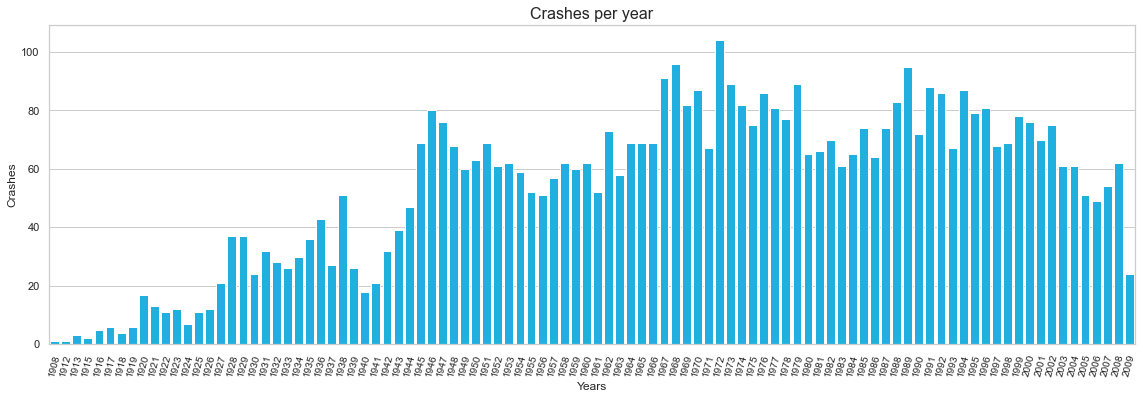

In [13]:
# plotting the crashes per year

figure = plt.figure(figsize=(16,16))
axis1 = figure.add_subplot(3,1,1)
sns.barplot(x=df_year.index,y=df_year.values,ax=axis1,color='deepskyblue')
axis1.set(ylabel="Crashes",xlabel="Years")
axis1.set_title("Crashes per year",fontsize=16)
axis1.set_xticklabels(df_year.index,rotation=75,fontsize=10)
plt.tight_layout(w_pad=4, h_pad=3)
plt.show()

#### Findings part - 1:

- The number of crashes gradually increased from 1908
- Till 1943 the accidents were only confined to 40 or less than that.
- After 1944 and upto 1962 the number rapidly increased which were greater than 40 and almost near to 60 crashes.
- From 1963 the number increases much more and each year minimum of 60 crashes sarted talking place and the number went till 100+ in the year 1972.
- After the advancement of auto-pilot some other major innovations of the air craft, the number started decreasing after 1972, but upto 2004 there were minimum of 60 crashes happening.
- The years 2005, 2006, 2007 had minimum of 40 crashes.
- After 2009, The numbers are drastically low, because of the capabilities of the modern aircraft.

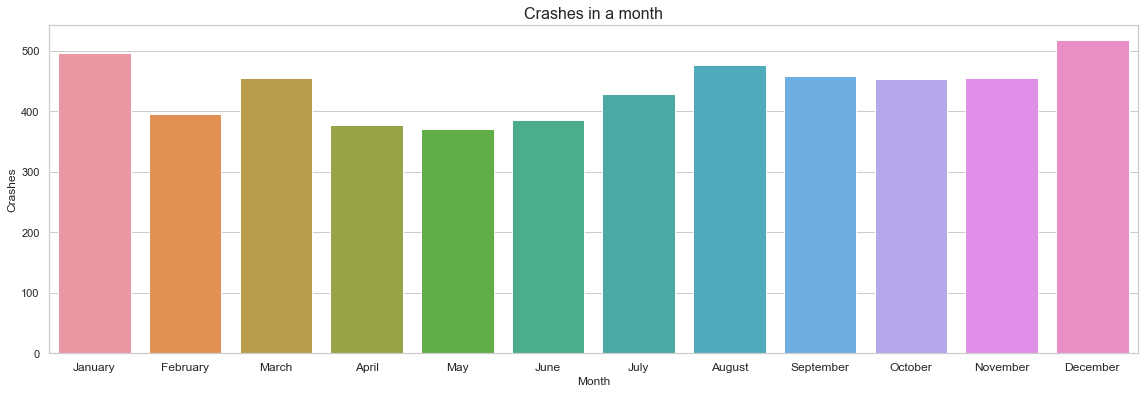

In [14]:
figure = plt.figure(figsize=(16,16))
axis2 = figure.add_subplot(3,1,1)
sns.barplot(x=df_month.index,y=df_month.values,ax=axis2)
axis2.set(ylabel="Crashes",xlabel="Month")
axis2.set_title("Crashes in a month",fontsize=16)
axis2.set_xticklabels(months,fontsize=12)
plt.tight_layout(w_pad=4, h_pad=3)
plt.show()

#### Findings part - 2:

- December months have more number of crashes with more than 500+ crashes.
- January months have the second highest month with crashes nearly 500.
- March, July, August, September, October, November have more than 400+ crashes.
- February, April, May, June have more than 300+ crashes.

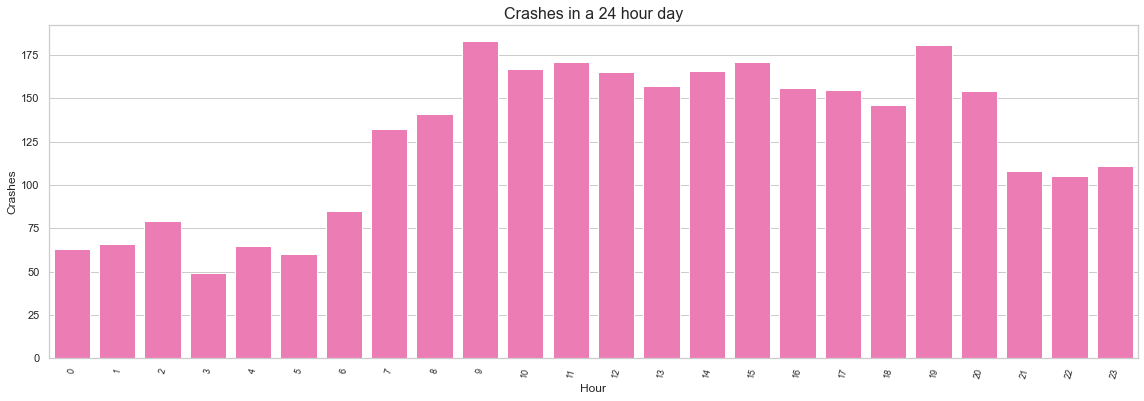

In [15]:
figure = plt.figure(figsize=(16,16))
axis3 = figure.add_subplot(3,1,2)
sns.barplot(x=df_hour.index,y=df_hour.values,ax=axis3,color='hotpink')
axis3.set(ylabel="Crashes",xlabel="Hour")
axis3.set_title("Crashes in a 24 hour day",fontsize=16)
axis3.set_xticklabels(df_hour.index,rotation=75,fontsize=9)
plt.tight_layout(w_pad=4, h_pad=3)
plt.show()

#### Findings part - 3:

- Most of the crashes occur between 9AM to 8PM which are actually the most busy hours in a day.

### Total number of people aboard the flight, number of people survived in flight and fatalities occured

In [16]:
# Dropping null values from the columns Aboard and Fatalities and check if there exist any outliers like fatalities > aboard

df[["Aboard","Fatalities"]].dropna()[df["Fatalities"] > df["Aboard"]]

<ipython-input-16-1ddf5600ceef>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[["Aboard","Fatalities"]].dropna()[df["Fatalities"] > df["Aboard"]]


,Aboard,Fatalities


In [17]:
# calculating the number of survivors

df["Survivors"] = df["Aboard"] - df["Fatalities"]

In [18]:
# calculating the total number of survived and fatalaties for each year

aboard_fatalities = df.pivot_table(values=["Aboard","Survivors","Fatalities"],index="Year",aggfunc=np.sum)
pd.set_option('display.max_rows', None)
print(aboard_fatalities)

      Aboard  Fatalities  Survivors
Year                               
1908     2.0         1.0        1.0
1912     5.0         5.0        0.0
1913    51.0        45.0        6.0
1915    60.0        40.0       20.0
1916   109.0       108.0        1.0
1917   124.0       124.0        0.0
1918    65.0        65.0        0.0
1919     5.0         5.0        0.0
1920    31.0        24.0        7.0
1921    69.0        68.0        1.0
1922    91.0        80.0       11.0
1923    80.0        77.0        3.0
1924    18.0        18.0        0.0
1925    68.0        39.0       29.0
1926    45.0        30.0       15.0
1927    73.0        54.0       19.0
1928   134.0       124.0       10.0
1929   152.0       119.0       33.0
1930   176.0       138.0       38.0
1931   113.0        94.0       19.0
1932    87.0        75.0       12.0
1933   212.0       192.0       20.0
1934   162.0       126.0       36.0
1935   273.0       226.0       50.0
1936   312.0       227.0       85.0
1937   331.0       203.0    

#### Findings part - 4:

- Fatilities are more than survivours in all the years from 1908 to 2009
- It is inevitable that whatever measure a we talk to protect as much as people aboard, the fatilities will be always greater than the surviviours.
- So what every measures had to be taken and the flights has to be maintained properly with good training to the pilots.

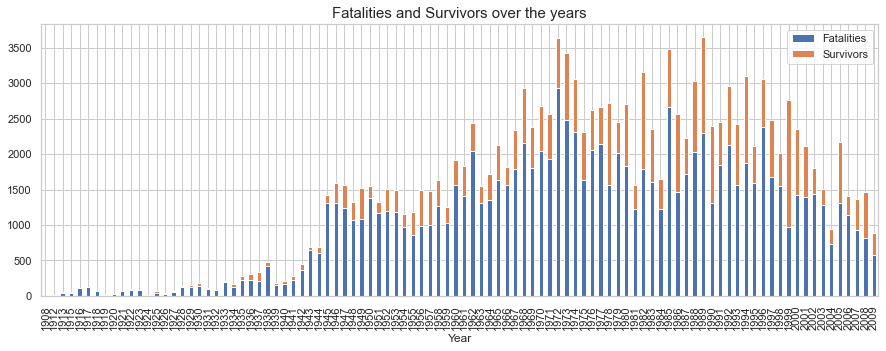

In [19]:
# Plotting the surviours and fatilities of the people onboard with years

figure = plt.figure(figsize=(15,5))
axis = figure.add_subplot(1,1,1)
aboard_fatalities_new = df.pivot_table(values=["Survivors","Fatalities"],index="Year",aggfunc=np.sum)
aboard_fatalities_new.plot(kind="bar",stacked=True,ax=axis)
plt.title("Fatalities and Survivors over the years",fontsize=15)
axis1.set_xticklabels(aboard_fatalities_new,fontsize=12)
plt.show()

#### Findings part - 5:

- Fatilities are more than survivours
- Fatilities rapidly increased 1945 and went till 1996.

### Finding the highest number of crashes by individual operators

In [20]:
# operators with highest number of fatalities

top_df = df.pivot_table(values="Fatalities",index="Operator",aggfunc=np.sum).sort_values(by="Operator", ascending=False).head(10)

Text(0.5, 1.0, 'Operators with highest number of crashes')

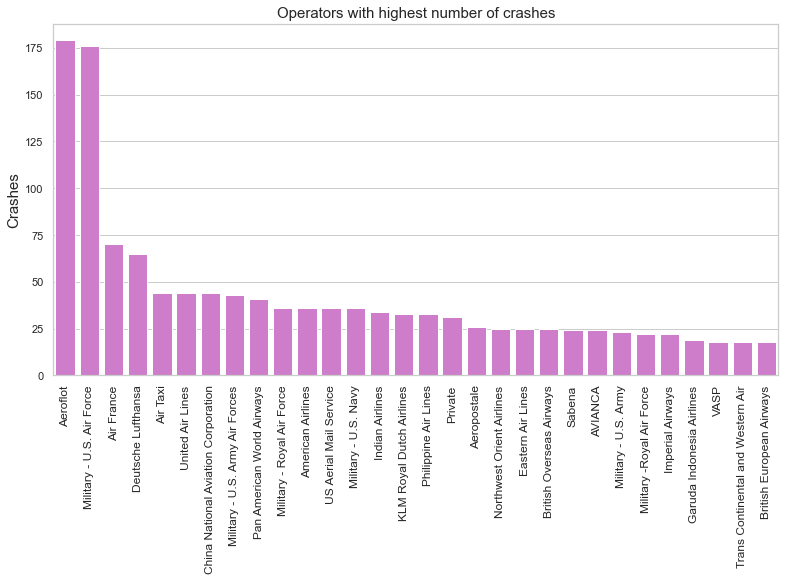

In [21]:
# plotting the operators with highest number of crashes

figure = plt.figure(figsize=(13,22))
axis1 = figure.add_subplot(3,1,1)
sns.barplot(x=df["Operator"].value_counts().head(30).index,y=df["Operator"].value_counts().head(30).values,ax=axis1,
            color='orchid')
axis1.set_ylabel("Crashes",fontsize=15)
axis1.set_xticklabels(df["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)
axis1.set_title("Operators with highest number of crashes",fontsize=15)

#### Findings part - 6:
- It is very unsafe to fly with "Aeroflot", which is a Russian airline. It has more than 175 crashes which is very deadliest.
- Air France and Lufthansa are also having greater than 50 crashes.
- This means the airline is either not maintining the flights properly or hiring pilots who are not properly trained.
- Even the US Military and Army forces are also having more crashes.
- Nearly 21 airlines have atleast 25 crashes which took place. It's better to avoid these airlines to fly.

Text(0.5, 1.0, 'Operators with highest number of Fatalities')

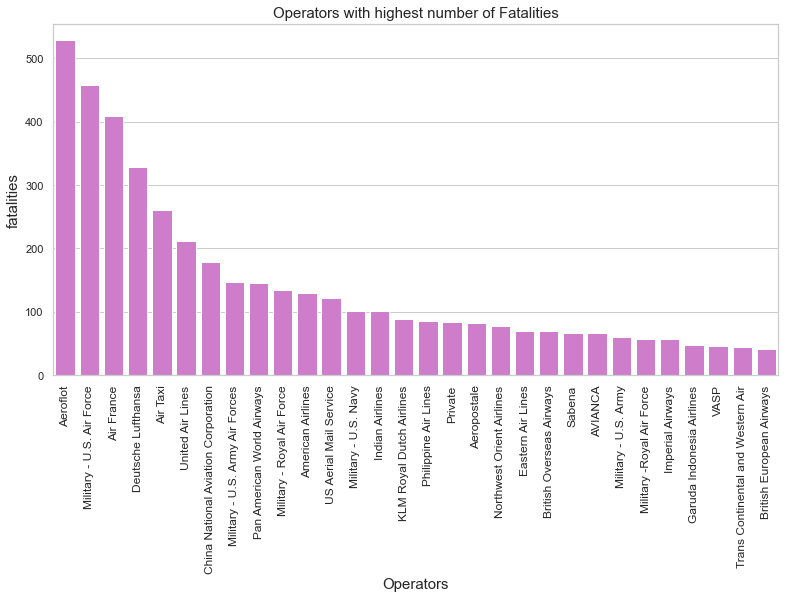

In [22]:
# plotting the operators with highest number of fatalities

figure = plt.figure(figsize=(13,22))
axis2 = figure.add_subplot(3,1,1)
sns.barplot(x=df["Operator"].value_counts().head(30).index,y=df["Fatalities"].value_counts().head(30).values,ax=axis2,
            color='orchid')
axis2.set_ylabel("fatalities",fontsize=15)
axis2.set_xlabel("Operators",fontsize=15)
axis2.set_xticklabels(df["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)
axis2.set_title("Operators with highest number of Fatalities",fontsize=15)

#### Findings part - 7:

- As we can tell by looking at the number of crashes, that flying with Aeroflot has killed more than 500+ people.
- It is then followed by Air France, that has killed 400+ of people.
- It is then followed by Lufthansa, that has killed 320+ of people.
- Many US Air Force Military people nearly 400+ have also died.
- There are 14 airlines which has killed atleast 100 people aboard. It's very unsafe to fly with them.

In [23]:
operator = df[["Operator","Fatalities"]].groupby("Operator").agg(["sum","count"])
operator

Fatalities      
                                                          sum count
Operator                                                           
A B Aerotransport                                         3.0     2
AB Aerotransport                                         58.0     3
ACES Colombia                                            40.0     3
ADC Airlines                                             97.0     2
ADES Colombia                                            22.0     2
AECA Cargo                                                4.0     1
AIDA                                                     14.0     1
AIRES Colombia                                           27.0     2
ALADA                                                    16.0     1
ALFA                                                     18.0     1
ALIANSA Colombia                                          8.0     1
ANDESA                                                   30.0     1
ANT Air Taxi                                              5.0     1
APRL                                                     11.0     1
AREA                                                     69.0     2
ARTOP Aerotopografica LDA                                36.0     1
ATESA                                                     5.0     1
ATI                                                       6.0     2
ATI Aircompany                                            8.0     1
AV Air / American Eagle                                  12.0     1
AVCOM                                                     2.0     1
AVENSA                                                    2.0     1
AVIANCA                                                 941.0    24
AVIANCA / AVIANCA                                        38.0     1
AVISPA                                                   40.0     1
AZAL Cargo Company                                        7.0     1
Aaxico Airlines                                           9.0     3
Ababeel Aviaition                                         4.0     1
Abakan Airlines                                           3.0     1
Aca-Ancargo                                              44.0     1
Ace Flying Service                                        2.0     1
Acme Air                                                  2.0     1
Action Air Express Inc. - Air Taxi                        2.0     1
Action Airlines                                           8.0     1
Adam Air                                                102.0     1
Aden Airways                                             45.0     2
Advance Airlines                                         13.0     1
Adventure Airlines                                       18.0     2
Aegler Stuart Flying Service  / Private                   4.0     1
Aer Lingus                                               87.0     3
Aer Turas                                                 2.0     1
Aeralpi                                                   4.0     1
Aerevias Centrales Air Service                            1.0     1
Aerial Transit Company                                    3.0     1
Aero Air                                                  3.0     1
Aero Asahi                                               10.0     1
Aero Cargo                                                1.0     1
Aero Club Libya                                          14.0     1
Aero Clube de Volta Redonda                               4.0     1
Aero Condor                                              10.0     1
Aero Cozumel                                              6.0     1
Aero Ejecutivos                                           3.0     1
Aero Eslava                                               4.0     1
Aero Ferinco Charter                                     19.0     1
Aero France                                              11.0     1
Aero Holland                                             34.0     1
Aero Jet Express                       

Text(0.5, 1.0, 'Air Craft type with highest number of crashes')

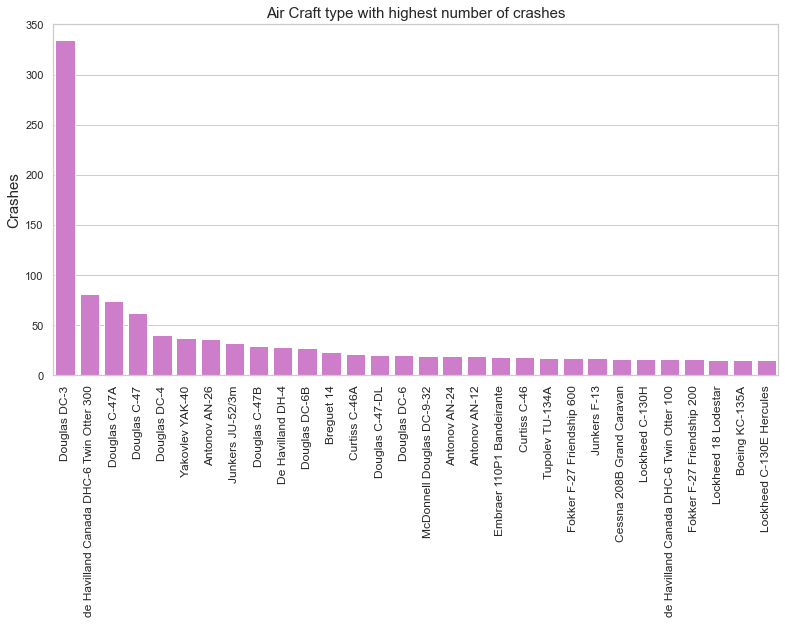

In [24]:
# plotting aircrafts with highest number of crashes

figure = plt.figure(figsize=(13,22))
axis1 = figure.add_subplot(3,1,1)
sns.barplot(x=df["Type"].value_counts().head(30).index,y=df["Type"].value_counts().head(30).values,ax=axis1,
            color='orchid')
axis1.set_ylabel("Crashes",fontsize=15)
axis1.set_xticklabels(df["Type"].value_counts().head(30).index,rotation=90,fontsize=12)
axis1.set_title("Air Craft type with highest number of crashes",fontsize=15)

#### Findings part - 8:

- More than 300+ of Douglas DC-3s have crashed. This is widely used by military people.
- Aircraft manufactured by companies like Douglas, De Havilland Canada, Antonov, Junckers, Fokkers are more prone to be crashed

### Finding the main reasons for a flight to Crash

In [25]:
# Performing Word Frequency Analysis

import textblob
stringText = textblob.TextBlob(str(list(df["Summary"]))).lower()
words = stringText.words

In [26]:
wordCount = {}
ignore = ['a', 'an', 'the', "'the", 'and', 'to', 'of', 'in', 'into', 'is', 'was', 'on', 'at', 'from', 'with',
          'while', 'for', "'s", 'as', 'not', 'by', 'after', 'during']

for word in words:
    if word in ignore:
        continue
    if word in wordCount:
        wordCount[word] = wordCount[word] + 1
    else:
        wordCount[word] = 1

In [27]:
import operator
sorted_word = sorted(wordCount.items(), key=operator.itemgetter(1), reverse=True)[:500]
with open("sorted_wordcount.txt", "w") as f:f.write(str(sorted_word))

In [28]:
print(sorted_word)

[('aircraft', 2465), ('crashed', 2109), ('plane', 1863), ('pilot', 1174), ("'crashed", 1105), ('flight', 1053), ('off', 1009), ('approach', 940), ('runway', 914), ('engine', 903), ('failure', 873), ('crew', 810), ('landing', 731), ('airport', 626), ('weather', 600), ('altitude', 598), ('which', 577), ('were', 577), ('it', 562), ('mountain', 556), ('takeoff', 545), ('conditions', 540), ('taking', 534), ('land', 522), ('control', 503), ('ground', 490), ('fire', 461), ('cargo', 454), ('route', 449), ('miles', 439), ('attempting', 433), ('struck', 412), ('ft', 401), ('en', 394), ('nan', 390), ('that', 369), ('no', 357), ('poor', 356), ('left', 354), ('when', 350), ('accident', 340), ('down', 336), ('loss', 328), ('fog', 327), ('right', 326), ('killed', 323), ('feet', 310), ('due', 307), ('lost', 307), ('failed', 307), ('fuel', 306), ('short', 302), ('shortly', 299), ('terrain', 296), ('flying', 292), ('low', 288), ('wing', 276), ('air', 275), ('trees', 270), ('emergency', 263), ('but', 259

In [29]:
# 6 Major Reasons of Airplane Crash After complete analysis of sorted_wordcount.txt and word frequency

reasons = ['weather', 'fire', 'shot down', 'stall/runway', 'pilot/crew error', 'systems failure']

In [30]:
expresion = ['((poor|bad).*(weather|visibility)|thunderstorm|fog)','(caught fire)|(caught on fire)', 
           '(shot down) | (terrorist) | (terrorism)', '(stall)|(runway)', '(pilot|crew) (error|fatigue)',
            '(engine.*(fire|fail))|(structural fail)|(fuel leak)|(langing gear)|(turbulence)|(electrical)|(out of fuel)|(fuel.*exhaust)']

In [31]:
df['Label'] = pd.Series(np.nan, index=df.index)
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,Day,Survivors,Label
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,1.0,NaN
1,1912-07-12,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,0.0,NaN
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,0.0,NaN
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,9,6.0,NaN
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,17,0.0,NaN


In [32]:
# Creation of train dataset

trainData = []
for x in range(len(df)):
    if df.loc[x,"Summary"] is np.nan:
        df.loc[x,"Label"] = "unknown"
    else:
        for y in range(len(expresion)):
            if re.search(expresion[y], df.loc[x,"Summary"].lower()):
                df.loc[x,"Label"] = reasons[y]
                temp = df.loc[x,"Summary"].lower(), df.loc[x,"Label"]
                trainData.append(temp)
                break

In [33]:
# Building of Naive Bayes Classifer

from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(trainData)

In [34]:
reasons.append("unknown")
for x in range(30,len(df)):
    if df.loc[x,"Label"] in reasons:
        continue
    else:
        df.loc[x,"Label"] = cl.classify(df.loc[x,"Summary"])

In [35]:
df.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,Day,Survivors,Label
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,1.0,NaN
1,1912-07-12,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,0.0,NaN
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,0.0,NaN
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,9,6.0,weather
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,17,0.0,NaN
5,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...,1915,3,5,20.0,shot down
6,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",1915,9,3,0.0,NaN
7,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",1916,7,28,0.0,NaN
8,1916-09-24,01:00:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,1916,9,24,0.0,shot down
9,1916-10-01,23:45:00,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,1916,10,1,0.0,shot down


In [36]:
df.to_csv('labelled.csv')

### Airplane Crashes by Label

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223312D10D0>],
      dtype=object)

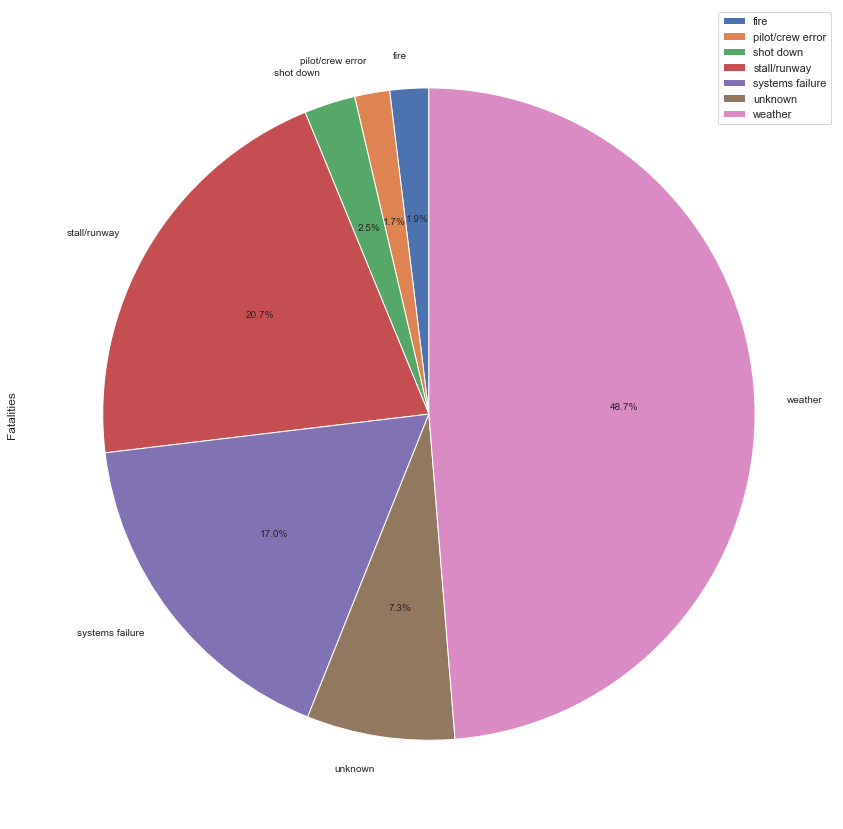

In [37]:
label = df.loc[:,["Fatalities","Label"]].groupby("Label").count()
label.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))

#### Findings part - 9:

- 48.7% of the aircraft crashes are because of the Weather Conditions.
- 20.7% of the aircraft crashes are due to either the aircrafts stalling, or overrunning the runway.
- 17% of the aircraft crashes are due to systems failure in the aircraft.
- 2.5% of the aircraft crashes are due to shot down by the government/others.
- 1.9% of the aircraft crashes are due to fire onboard.
- 1.7% of the aircraft crashes are due to the pilot/crew error.

So, It's better not to travel during extreme weather conditions like heavy rain or snow fall, or storms etc.

### Fatalities by Label

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022331611D60>],
      dtype=object)

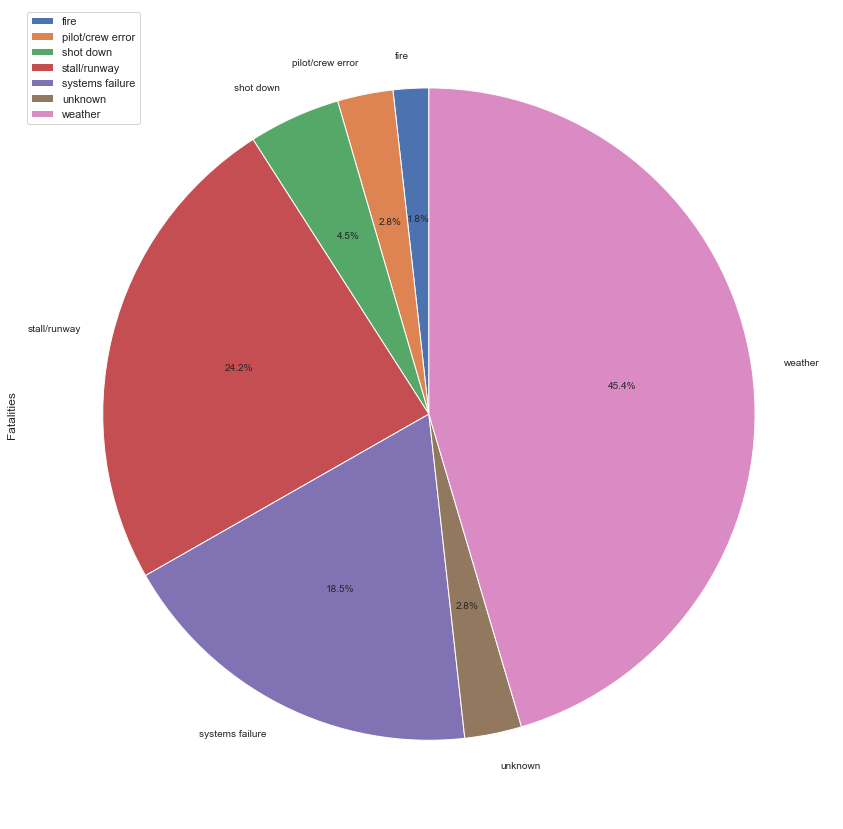

In [38]:
fatalitiesByLabel = df.loc[:,["Fatalities","Label"]].groupby("Label").sum()
fatalitiesByLabel.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))

#### Findings part - 10:

- As we can tell from findings-9 pie chart and the above pie chart, more fatilities occur when there is a bad weather, which is then followed by stall/ overrunning the runway, systems failure, shotdown, pilot/crew error, fire onboard.

- We can't control any other option except postponing the travel on a extremely bad weather day.

### Finding if there is any relation between the Airports and Air Crashes

According to a study, 49% of all fatal accidents happen during the final descent and landing phases of the average flight, while 14% of all fatal accidents happen during takeoff and initial climb. Because during takeoff and landing, pilots have less time to react to problems because they're on or close to the ground and moving quickly.

In [39]:
routes=df['Route']
routes=routes.dropna().str.lower().str.replace(" ", "").str.split("-")
routes=routes[routes.str.len()==2]
dept2Dest=pd.DataFrame({'Departure': routes.str.get(0), 'Destination': routes.str.get(1)})

### Most Dangerous City for airplane takeoff

Text(0, 0.5, 'Number of Crash')

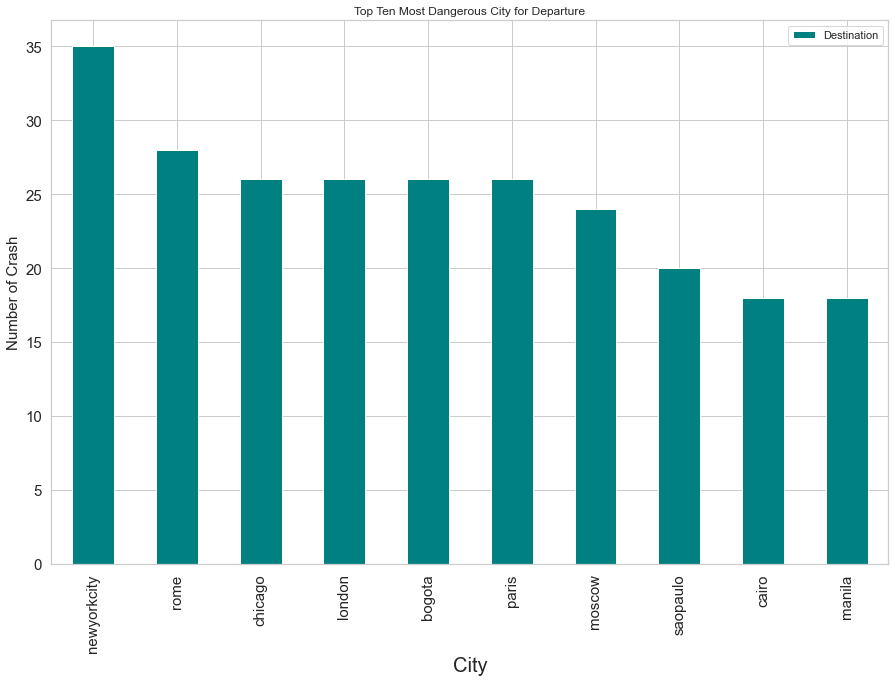

In [40]:
departure = dept2Dest.groupby(['Departure']).count().sort_values(by="Destination", ascending=False).head(10)
plot= departure.plot.bar(figsize=(15,10), title="Top Ten Most Dangerous City for Departure", fontsize=15,color="teal")
plot.set_xlabel("City", fontsize=20)
plot.set_ylabel("Number of Crash", fontsize=15)

#### Finding part - 11:

- The fatal accidents that happen during takeoff and initial climb, are mostly when the air craft took off from New York City, which is then followed by Rome, Chicago, London, Bogota, Paris, Mascow, Saopaulo, Cairo, Manila Airports.

- Airlines and pilots should be very vigilant.

### Most Dangerous city for Airplane landing

Text(0, 0.5, 'Number of Crash')

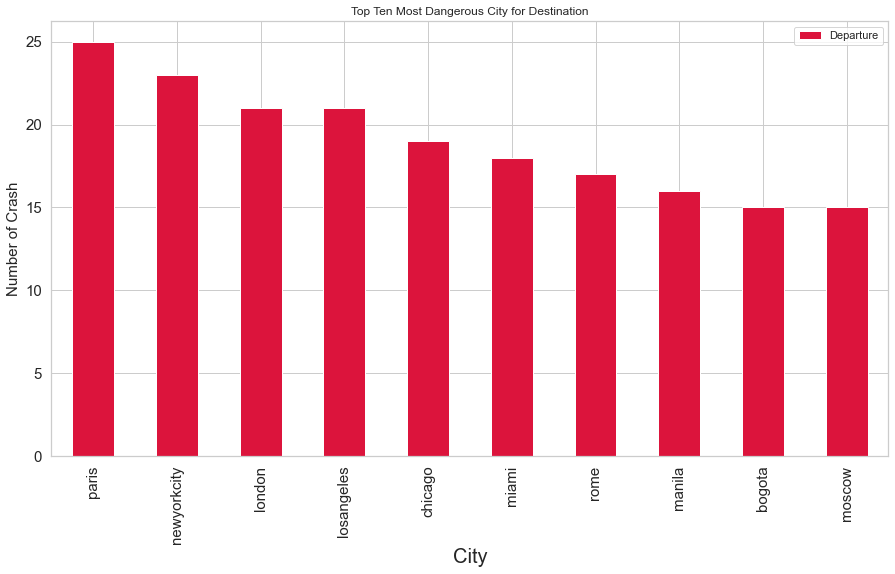

In [41]:
destination = dept2Dest.groupby(['Destination']).count().sort_values(by="Departure", ascending=False).head(10)
plot= destination.plot.bar(figsize=(15,8), title="Top Ten Most Dangerous City for Destination", fontsize=15,color="crimson")
plot.set_xlabel("City", fontsize=20)
plot.set_ylabel("Number of Crash", fontsize=15)

#### Finding part - 12:

- The fatal accidents happen during the final descent and landing phases are mostly from the Miami Airport, which is then followed by New York City, London, Los Angeles, Chicago, Miami, Rome, Bogota, Mascow.